In [40]:
from typing import TypedDict, NotRequired
from langgraph.graph import StateGraph, START, END
import random

In [41]:
class AgentState(TypedDict):
    player_name: str
    guesses: list[int]
    attempts: int
    lower_bound: int
    upper_bound: int
    secret: NotRequired[int]
    status: NotRequired[str]

In [45]:
def setup_node(state:AgentState) -> AgentState:
    state["player_name"] = f"Hi there, {state["player_name"]}"
    state["attempts"] = 0
    state["secret"] = random.randint(state["lower_bound"], state["upper_bound"])
    state["status"] = ""
    return state

def guessing_node(state:AgentState) -> AgentState:
    if state["status"] == "lower":
        state["lower_bound"] = state["guesses"][state["attempts"] - 1] + 1
    elif state["status"] == "higher":
        state["upper_bound"] = state["guesses"][state["attempts"] - 1] - 1
    state["attempts"] += 1
    guess = random.randint(state["lower_bound"], state["upper_bound"])
    print(f"Attempt {state["attempts"]}: My guess number is {guess}\n")
    state["guesses"].append(guess)

    return state

def hint_node(state:AgentState) -> AgentState:
    if state["guesses"][state["attempts"] - 1] < state["secret"]:
        print("Your guess number is lower than secret number\n")
        state["status"] = "lower"
    elif state["guesses"][state["attempts"] - 1] > state["secret"]:
        print("Your guess number is higher than secret number\n")
        state["status"] = "higher"
    else:
        print("Congratulations! Your guess is correct\n")
        state["status"] = "correct"

    return state

def should_continue(state:AgentState) -> AgentState:
    if state["status"] == "correct":
        return "exit"
    else:
        if state["attempts"] >= 7:
            print(f"You have reached max attempt number. Secret number is {state["secret"]}")
            return "exit"
        else:
            print("Please try again!\n")
            return "loop"

In [46]:
graph = StateGraph(AgentState)

graph.add_node("setup", setup_node)
graph.add_node("guess", guessing_node)
graph.add_node("hint", hint_node)
graph.add_edge("setup", "guess")
graph.add_edge("guess", "hint")
graph.add_conditional_edges(
    "hint",
    should_continue,
    {
        "loop": "guess",
        "exit": END
    }
)
graph.set_entry_point("setup")

app = graph.compile()

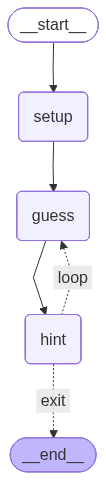

In [23]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [51]:
initial_state1 = AgentState(player_name="Student", guesses=[], attempts=0, lower_bound=1, upper_bound=20)
print(app.invoke(initial_state1))

Attempt 1: My guess number is 6

Your guess number is higher than secret number

Please try again!

Attempt 2: My guess number is 1

Your guess number is lower than secret number

Please try again!

Attempt 3: My guess number is 4

Your guess number is higher than secret number

Please try again!

Attempt 4: My guess number is 3

Congratulations! Your guess is correct

{'player_name': 'Hi there, Student', 'guesses': [6, 1, 4, 3], 'attempts': 4, 'lower_bound': 2, 'upper_bound': 3, 'secret': 3, 'status': 'correct'}
